100%|██████████| 1000/1000 [00:17<00:00, 58.23it/s]


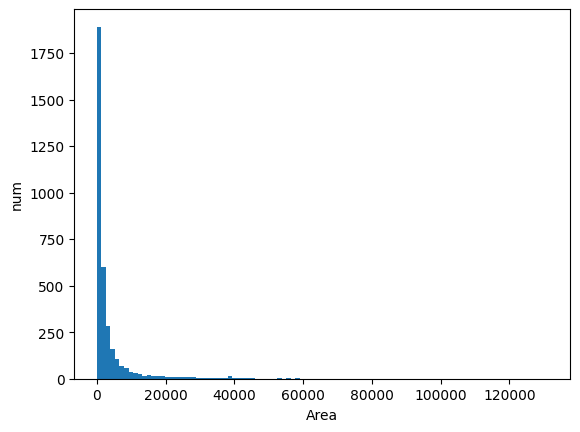

min_area : 1125.5


In [1]:
import os
import json
import numpy as np
import cv2
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

anno_path = "/data/ed/iseg/TF_model_datasets/ad_dataset/annotations/train_preprocessing"
image_path = "/data/ed/iseg/TF_model_datasets/ad_dataset/images"
out_anno_path = "/data/noah/dataset/AD_INPAINT/anno"
out_image_path = "/data/noah/dataset/AD_INPAINT/images"

sizes = []
class_name = "pedestrian"

for anno_name in tqdm(os.listdir(anno_path)[:1000]):
    path = os.path.join(anno_path, anno_name)
    with open(path, "r") as f:
        anno = json.load(f)
    f.close()

    for ann in anno["annotations"]:
        if ann["label"] == class_name:
            mask = np.zeros((anno["metadata"]["height"], anno["metadata"]["width"]))
            points = np.array(ann["points"], dtype=np.int32)

            try:
                cv2.fillPoly(mask, [points], color=255)
            except:
                continue
            
            area = np.count_nonzero(mask == 255)
            sizes.append(area)

# 리스트의 인덱스를 x 값으로 사용
x = list(range(len(sizes)))
# sizes = sorted(sizes)

# 선 그래프로 시각화
plt.hist(sizes, bins=100)
# plt.plot(x, sizes)
plt.xlabel("Area")
plt.ylabel("num")
plt.title("")
plt.show()

min_area = np.median(sizes)
print("min_area : {}".format(min_area))

In [ ]:
import shutil

for anno_name in tqdm(os.listdir(anno_path)[:5000]):
    path = os.path.join(anno_path, anno_name)
    with open(path, "r") as f:
        anno = json.load(f)
    f.close()

    new_annos = []

    for ann in anno["annotations"]:
        if ann["label"] == class_name:
            mask = np.zeros((anno["metadata"]["height"], anno["metadata"]["width"]))
            points = np.array(ann["points"], dtype=np.int32)

            try:
                cv2.fillPoly(mask, [points], color=255)
            except:
                continue

            area = np.count_nonzero(mask == 255)

            if area >= min_area:
                new_annos.append(ann)

    if len(new_annos):
        src_path = os.path.join(image_path, anno["parent_path"][1:], anno["filename"])
        dst_path = os.path.join(out_image_path, anno["filename"])
        shutil.copy(src_path, dst_path)

        anno["annotations"] = new_annos
        anno["parent_path"] = out_image_path

        with open(os.path.join(out_anno_path, anno_name), "w") as f:
            json.dump(anno, f)